<a href="https://colab.research.google.com/github/ConnnorM/FIRST-Robotics-2022-World-Championship-Analysis/blob/main/CPSC392_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

%matplotlib inline

In [ ]:
#Read in and set up the data:
data = pd.read_csv("https://raw.githubusercontent.com/ConnnorM/CPSC392FinalProject/main/FinalProj%20Actual%20Set%202022%20Worlds.csv?token=GHSAT0AAAAAABRHGSKRG4RH7T5XGMQGALKQYUP6ETQ")
data.head()


,Team Number,A: Median HG Attempt,A: Avg. HG Made,T: Avg. HG Attempt,T: Avg. HG Made,C: Attempt Percent,C: Max Rung,C: Avg. Time,P: Avg. Speed,Avg Pts. Per Match,Playoffs Alliance,Comp Rank
0,604,3.0,2.11,16.14,13.00,100.00,4,15.67,7.78,51.4400,1,1
1,870,2.0,1.89,15.67,13.44,55.56,4,12.60,6.67,44.7740,1,2
2,1323,4.0,3.56,21.44,20.00,100.00,4,12.22,6.78,71.2400,1,3
3,1690,5.0,4.44,22.89,20.22,55.56,4,7.75,7.33,68.5340,1,4
4,862,2.5,2.38,11.50,9.50,66.67,4,21.40,6.38,40.5205,1,5


**Q1: Question**
* When considering A: Median HG Attempt, A: Avg. HG Made, T: Avg. HG Attempt, T: Avg. HG Made, and C: Attempt Percent, what clusters emerge, and what characterizes these clusters?

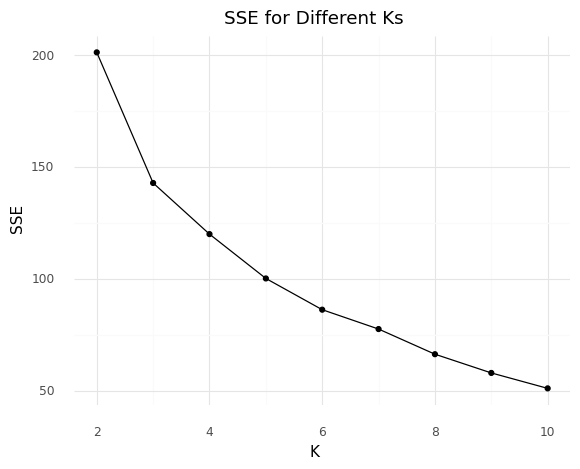

<ggplot: (8745940444893)>

In [ ]:
features = ["A: Median HG Attempt", "A: Avg. HG Made", "T: Avg. HG Attempt", 
            "T: Avg. HG Made","C: Attempt Percent"]
X = data[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

#perform K Means to determine optimal number of clusters
ks = [2,3,4,5,6,7,8,9,10]

sse = []
sils = []

for k in ks:
  km = KMeans(n_clusters=k)
  km.fit(X)
  sse.append(km.inertia_) #inertia is sums of squared errors of distance from center of cluster
  sils.append(silhouette_score(X, km.predict(X)))

sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "SSE")) 
    + geom_point()
    + geom_line()
    + theme_minimal()
    + labs(title = "SSE for Different Ks"))

Captions:
* Figure 1: A comparison of the different Sums of Squared Errors for separate KMEANS models when creating a different number of clusters (2 to 10 clusters). Used to determine the optimal number of clusters to make for further modeling.

Silhouette:  0.25531860911548726


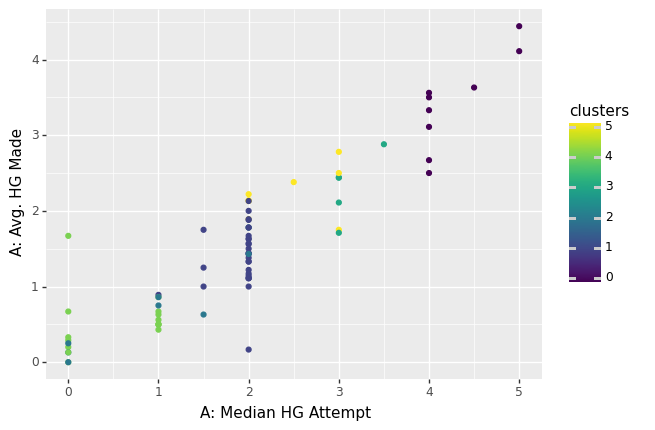

<ggplot: (8745940620841)>


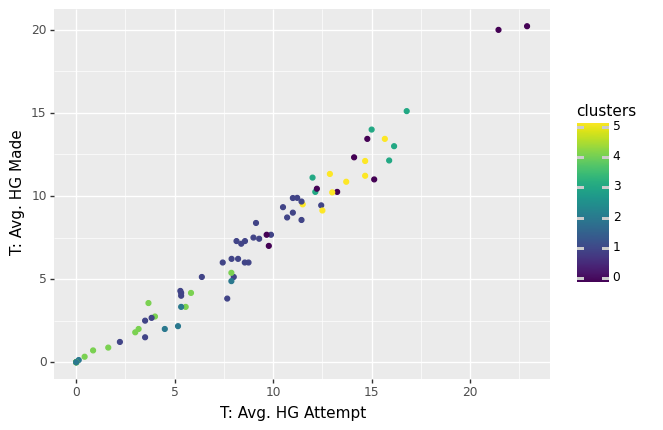

<ggplot: (8745940553997)>


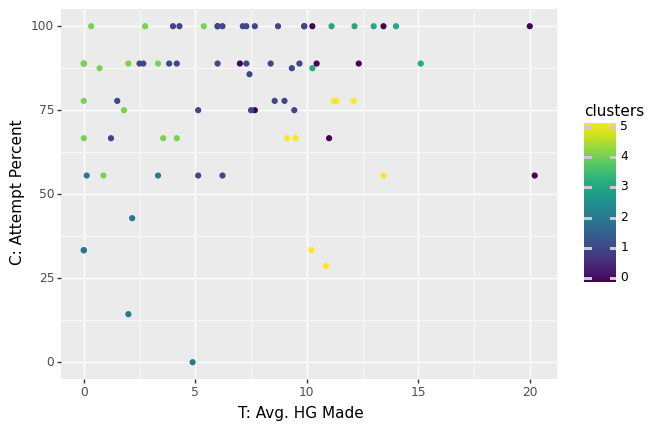

<ggplot: (8745940428173)>


In [ ]:
#Now that we know how many clusters to make, create the EM model
#and graph the results
EM = GaussianMixture(n_components = 6)

EM.fit(X)

clusters = EM.predict(X)

print("Silhouette: ", silhouette_score(X, clusters))

X["clusters"] = clusters
data["clusters"] = clusters

print((ggplot(data, aes(x = "A: Median HG Attempt", y = "A: Avg. HG Made", color = "clusters")) + geom_point()))
print((ggplot(data, aes(x = "T: Avg. HG Attempt", y = "T: Avg. HG Made", color = "clusters")) + geom_point()))
print((ggplot(data, aes(x = "T: Avg. HG Made", y = "C: Attempt Percent", color = "clusters")) + geom_point()))

Captions:
* Figure 2: Average Number of High Goals Attempted versus Average Number of High Goals Made in the autonomous period. Shows the differences in autonomous performance for each cluster.
* Figure 3: Average Number of High Goals Attempted versus Average Number of High Goals Made in the teleoperated period. Shows the differences in teleoperated performance for each cluster.
* Figure 4: Successful Climb Percent versus Average Number of High Goals Made in the teloperated period. Shows the relationship between the two key parts of teleoperated performance for each cluster.

In [ ]:
a_mean_med_hg_attempt = data.groupby("clusters")["A: Median HG Attempt"].mean()
a_mean_hg_made = data.groupby("clusters")["A: Avg. HG Made"].mean()
t_mean_hg_attempt = data.groupby("clusters")["T: Avg. HG Attempt"].mean()
t_mean_hg_made = data.groupby("clusters")["T: Avg. HG Made"].mean()
climb_percent = data.groupby("clusters")["C: Attempt Percent"].mean()

print(a_mean_med_hg_attempt, '\n')
print(a_mean_hg_made, '\n')
print(t_mean_hg_attempt, '\n')
print(t_mean_hg_made, '\n')
print(climb_percent, '\n')


clusters
0    4.277778
1    1.916667
2    0.785714
3    2.916667
4    0.533333
5    2.437500
Name: A: Median HG Attempt, dtype: float64 

clusters
0    3.427778
1    1.409567
2    0.578571
3    2.226667
4    0.529333
5    2.223750
Name: A: Avg. HG Made, dtype: float64 

clusters
0    14.807778
1     8.135333
2     3.287143
3    14.658333
4     2.402000
5    13.575000
Name: T: Avg. HG Attempt, dtype: float64 

clusters
0    12.483333
1     6.401667
2     1.787143
3    12.601667
4     1.660667
5    10.976250
Name: T: Avg. HG Made, dtype: float64 

clusters
0    84.877778
1    87.348667
2    33.561429
3    96.065000
4    82.686667
5    60.517500
Name: C: Attempt Percent, dtype: float64 



**Q1: Response**
* My first objective was to discover different clusters of robots using their offensive scoring capabilities. 
* Before forming the clusters, I needed to decide how many clusters to make in order to accurately represent the different categories of robots in the data. Therefore, I created a KMeans model multiple times, each time using a different number of clusters. I then chose the number of clusters with the best performance, which was six.
* After using a simpler model in order to determine how many clusters I should create, I created a Gaussian Mixtures model in order to create clusters of robots with similar performances.
* Six distinct clusters, or groups (labeled 0 through 5), of robots emerged from this data.
* 0: High Tier: This cluster is characterized by robots with a high climb rate and a high number of points scored in the teleoperated and autonomous periods. 
* 1: Bad Defense Bots: This cluster is characterized by robots that primarily played defense, were unable to score during autonomous, and had a very low climb rate.
* 2: Top Tier: This cluster contains the best robots in the tournament. These robots had the highest number of points scored in the autonomous and teleoperated periods while maintaining a high climb rate.
* 3: Mid Tier: Robots in this cluster have poor performances in the autonomous period, yet they had a high number of points scored in the teleoperated period while also having a high climb rate.
* 4: Good Defense Bots: This cluster is composed of robots that mostly played defense during the tournament. These robots scored points during the autonomous period (in which they cannot play defense), and they had a high climb rate. During the teleoperated period, these robots had a high accuracy yet attempted very few shots due to their focus on playing defense.
* 5: Bottom Tier: This cluster is composed of the worst robots at the tournament. These robots were mostly unable to score at all during the autonomous and teleoperated periods, and their climb rate was lower than all other clusters except for the Bad Defense Bots.
* From this analysis, I learned that there are six unique and easily distinguishable clusters of robots as opposed to the four clusters that I had predicted would exist. The important takeaways are that the top tier robots had far superior teleoperated performances compared to all other groups, having a high climb rate seems to be very important to a robot's success, and the best defense bots are those that are able to score points during autonomous and consistently climb.


**Q2: Question**
* When predicting a team’s final ranking using Linear Regression, which variables have the strongest weight? When using Lasso Regression, which variables’ coefficients are reduced to zero?
* NOTE FOR INSTRUCTOR: As we discussed in class, I used a train-test split instead of KFold cross validation for these models. Since I was comparing R2 values of the two models, we agreed that it would make more sense to use a train-test split, which is different from what my analysis plan said that I would use.


In [ ]:
#Determine the predictors for a regression model
predictors = ['A: Median HG Attempt', 'A: Avg. HG Made',
       'T: Avg. HG Attempt', 'T: Avg. HG Made', 'C: Attempt Percent',
       'C: Max Rung', 'C: Avg. Time', 'P: Avg. Speed', 'Avg Pts. Per Match']

contin = ['A: Median HG Attempt', 'A: Avg. HG Made','T: Avg. HG Attempt', 
          'T: Avg. HG Made', 'C: Attempt Percent', 'C: Avg. Time', 
          'P: Avg. Speed', 'Avg Pts. Per Match']

Xlr = data[predictors]
ylr = data["Comp Rank"]

#80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(Xlr, 
                                                    ylr, 
                                                    test_size = 0.2,
                                                    random_state = 401)

#Z score continuous variables
Z2 = StandardScaler()
X_train[contin] = Z2.fit_transform(X_train[contin])
X_test[contin] = Z2.transform(X_test[contin])

In [ ]:
#Fit the linear regression model to the training set
linReg = LinearRegression()
linReg.fit(X_train,y_train)

#make predictions
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

#get and print the test statistics
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)


print("Training R2: ", train_r2)
print("Testing R2: ", test_r2)
print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

Training R2:  0.5831888036485613
Testing R2:  0.34815614334077694
Training MSE:  202.86328285401186
Testing MSE:  212.22877139301352


In [ ]:
#Collect and print the coefficients of the linear regression model
linRegCoefs = linReg.coef_
rows = ['A: Median HG Attempt', linRegCoefs[0]],['A: Avg. HG Made', linRegCoefs[1]],['T: Avg. HG Attempt', linRegCoefs[2]],['T: Avg. HG Made', linRegCoefs[3]],['C: Attempt Percent', linRegCoefs[4]],['C: Max Rung', linRegCoefs[5]],['C: Avg. Time', linRegCoefs[6]],['P: Avg. Speed', linRegCoefs[7]],['Avg Pts. Per Match', linRegCoefs[8]]

coeffsDF = pd.DataFrame(data = rows)
coeffsDF

,0,1
0,A: Median HG Attempt,11.859595
1,A: Avg. HG Made,-18.535486
2,T: Avg. HG Attempt,2.699587
3,T: Avg. HG Made,-8.895786
4,C: Attempt Percent,-5.066548
5,C: Max Rung,-2.804423
6,C: Avg. Time,0.441551
7,P: Avg. Speed,-2.405976
8,Avg Pts. Per Match,1.355768


Captions:
* Figure 1: A chart displaying the weights of each coefficient in the linear regression model predicting a team's final ranking (a lower number rank is a higher rank than a higher number. For example, the team ranked 1 is the highest ranked team in the tournament, so positively impactful coefficients are marked with a negative sign).

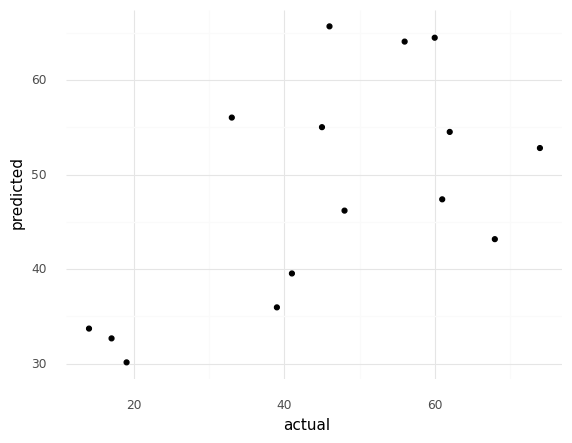

<ggplot: (8745940682589)>


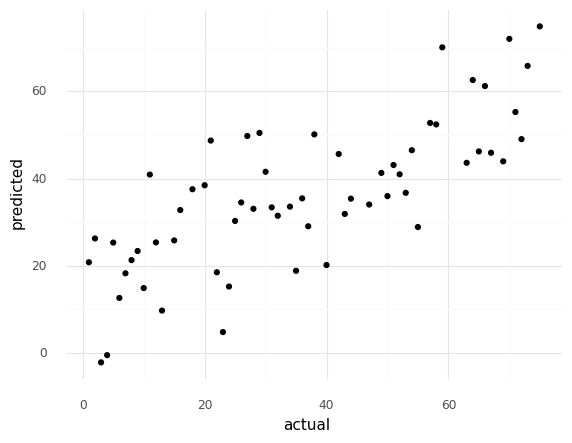

<ggplot: (8745940398185)>


In [ ]:
#Plot the predicted vs actual ranks
LRtrainingDF = pd.DataFrame({"predicted": y_pred_train, "actual": y_train}) 
LRtestingDF = pd.DataFrame({"predicted": y_pred_test, "actual": y_test})
print((ggplot(LRtestingDF, aes(x = "actual", y = "predicted")) + 
       geom_point() +
       theme_minimal()))

print((ggplot(LRtrainingDF, aes(x = "actual", y = "predicted")) + 
       geom_point() +
       theme_minimal()))

Captions:
* Figure 2: A plot of the model's predicted rankings for the testing set versus the actual rankings of the teams in that data set.
* Figure 3: A plot of the model's predicted ranking for the training set versus the actual rankings of the teams in that data set.

In [ ]:
#Try again with LASSO regression:
LassoReg = Lasso()
LassoReg.fit(X_train, y_train)

lasso_preds_train = LassoReg.predict(X_train)
lasso_preds_test = LassoReg.predict(X_test)

#get test statistics
lasso_train_r2 = r2_score(y_train, lasso_preds_train)
lasso_train_mse = mean_squared_error(y_train, lasso_preds_train)
lasso_test_r2 = r2_score(y_test, lasso_preds_test)
lasso_test_mse = mean_squared_error(y_test, lasso_preds_test)


print("Lasso Training R2: ", lasso_train_r2)
print("Lasso Testing R2: ", lasso_test_r2)
print("Lasso Training MSE: ", lasso_train_mse)
print("Lasso Testing MSE: ", lasso_test_mse)

Lasso Training R2:  0.5339847333539498
Lasso Testing R2:  0.16019928985227083
Lasso Training MSE:  226.81105421216958
Lasso Testing MSE:  273.424181433698


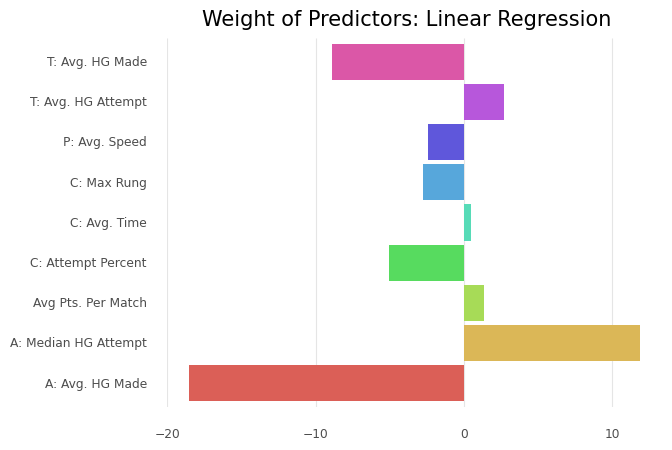

<ggplot: (8745940313289)>


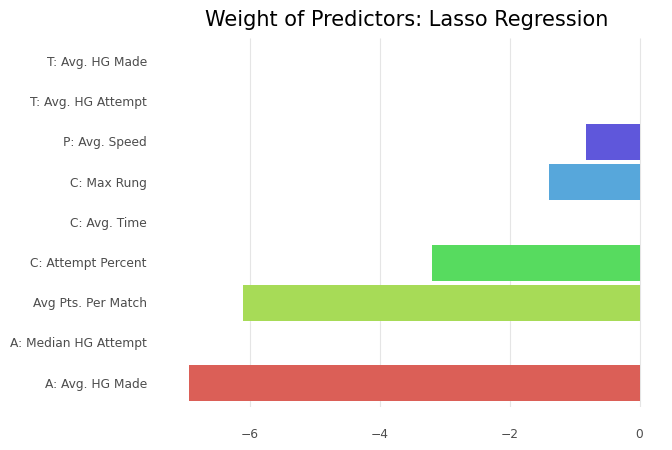

<ggplot: (8745940247737)>


In [ ]:
#create a data frame of the lasso and linear regression coefficients
lassoRegCoefs = LassoReg.coef_
Lasso_rows = ['A: Median HG Attempt', lassoRegCoefs[0]],['A: Avg. HG Made', lassoRegCoefs[1]],['T: Avg. HG Attempt', lassoRegCoefs[2]],['T: Avg. HG Made', lassoRegCoefs[3]],['C: Attempt Percent', lassoRegCoefs[4]],['C: Max Rung', lassoRegCoefs[5]],['C: Avg. Time', lassoRegCoefs[6]],['P: Avg. Speed', lassoRegCoefs[7]],['Avg Pts. Per Match', lassoRegCoefs[8]]

LassocoeffsDF = pd.DataFrame(data = Lasso_rows)
Q2CoeffsDF = LassocoeffsDF.rename(columns={0: "Predictors", 1: "Lasso Coeff"})
Q2CoeffsDF["Lin Reg Coeff"] = coeffsDF[1]


print((ggplot(Q2CoeffsDF, aes(x = "Predictors", y= "Lin Reg Coeff", fill = "Predictors")) 
        + geom_bar(stat = "identity")
        + ggtitle("Weight of Predictors: Linear Regression")
        + labs(x = "", y = "")
        #+ scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2", "#f0e442", "#009e73"])
        + theme_minimal()
        + coord_flip()
        + theme(panel_grid_major_y = element_blank(),
          panel_grid_minor_x = element_blank(),
          panel_grid_minor_y = element_blank(),
          plot_title = element_text(size = 15),
          legend_position = "none")))

print((ggplot(Q2CoeffsDF, aes(x = "Predictors", y= "Lasso Coeff", fill = "Predictors")) 
        + geom_bar(stat = "identity")
        + ggtitle("Weight of Predictors: Lasso Regression")
        + labs(x = "", y = "")
        #+ scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2", "#f0e442", "#009e73"])
        + theme_minimal()
        + coord_flip()
        + theme(panel_grid_major_y = element_blank(),
          panel_grid_minor_x = element_blank(),
          panel_grid_minor_y = element_blank(),
          plot_title = element_text(size = 15),
          legend_position = "none")))

Captions:
* Figure 4: A plot of the weights of the coefficients of the linear regression model.
* Figure 5: A plot of the weights of the coefficients of the LASSO regression model.

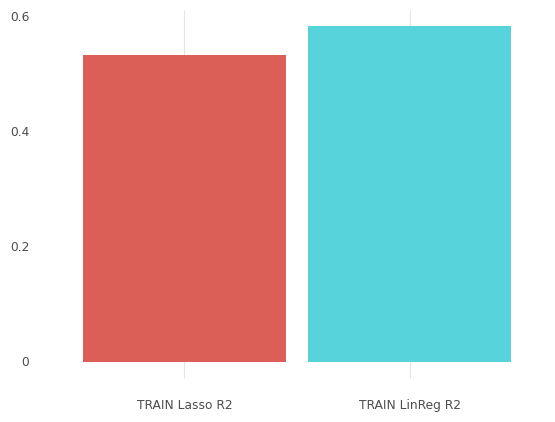

<ggplot: (8745940221609)>


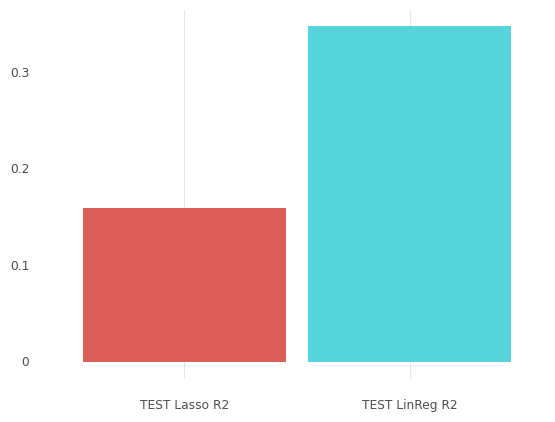

<ggplot: (8745940345097)>


In [ ]:
#Create a bar chart of the train/test R2 values for both 
#iterations of the model

rowLabels1 = ["TRAIN LinReg R2", train_r2], ["TRAIN Lasso R2", lasso_train_r2]
rowLabels2 = ["TEST LinReg R2", test_r2], ["TEST Lasso R2", lasso_test_r2]

r2CompDF1 = pd.DataFrame(rowLabels1)
r2CompDF1 = r2CompDF1.rename(columns={0: "Label", 1: "R2 Value"})

r2CompDF2 = pd.DataFrame(rowLabels2)
r2CompDF2 = r2CompDF2.rename(columns={0: "Label", 1: "R2 Value"})


print((ggplot(r2CompDF1, aes(x = "Label", y= "R2 Value", fill = "Label")) 
        + geom_bar(stat = "identity")
        + ggtitle("")
        + labs(x = "", y = "")
        #+ scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2", "#f0e442", "#009e73"])
        + theme_minimal()
        + theme(panel_grid_major_y = element_blank(),
          panel_grid_minor_x = element_blank(),
          panel_grid_minor_y = element_blank(),
          plot_title = element_text(size = 15),
          legend_position = "none")))

print((ggplot(r2CompDF2, aes(x = "Label", y= "R2 Value", fill = "Label")) 
        + geom_bar(stat = "identity")
        + ggtitle("")
        + labs(x = "", y = "")
        #+ scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2", "#f0e442", "#009e73"])
        + theme_minimal()
        + theme(panel_grid_major_y = element_blank(),
          panel_grid_minor_x = element_blank(),
          panel_grid_minor_y = element_blank(),
          plot_title = element_text(size = 15),
          legend_position = "none")))

Captions:
* Figure 6: A comparison of the R2 values for both models on the training set. The linear regression model performed better.
* Figure 7: A comparison of the R2 values for both models on the testing set. Both models performed almost identically (LASSO was marginally superior), with the linear model having an R2 of 0.58808 while the LASSO model has an R2 of 0.58698.

**Q2: Response**
* The next step of my analysis was to create a Linear Regression model that would use all of the available variables in order to predict each team's ranking. Afterwards, I created a LASSO Regression model that eliminated the variables that are deemed as unimportant in predicting a team's final ranking. I then compared the two models in order to determine which variables are truly important when it comes to predicting a team's final rank. I also chose to compare the training and testing set accuracies of both models in order to determine which is more effective.
* The linear model deemed that the high goal statistics for the teleoperated period were both important, yet the signs of their coefficients were opposite, showing that they cancel each other out. The LASSO model proves this point as it reduces both of these predictors to zero influence on the prediction. The reason that this is acceptable is that the model also uses a team's average points scored per match, which is calculated from multiple variables including a team's average high goal shots made in the teleoperated period. Therefore, this data is still included in the model even if the two collinear teleoperated variables have been eliminated. 
* The max rung that a team could climb to was also eliminated as the vast majority of teams at the event could climb to the fourth rung, and of the the teams that could not, very few of them could climb at all. Therefore, this metric does little in being able to distinguish the highly ranked teams from the low-ranked teams. 
* Lastly, we see that the median number of high goals attempted in the autonomous period was eliminated from the LASSO model despite having a significant impact on the linear model. This variable is able to be eliminated due to its collinearity with the average number of high goal shots made during autonomous. Both of these variables are measurements of a team's shooting capabilities during autonomous, so the model does not deem both variables as being significant enough to retain in the model, especially considering that a team's average points scored for match is partially calculated using the actual number of shots made during autonomous and not using the number of shots attempted.
* From the results of both models, it appears that the most important predictors of a team's final ranking are: A: Avg. High Goal Made, C: Climb Percent, and Avg Pts. Per Match. Therefore, when deciding what capabilities to focus on when building a robot, this model suggests that a robot's autonomous scoring and climbing reliability are the most important factors to focus on. As opposed to being concerned with the speed of a climb, the consistency of the climb is shown to be more important, and having a top tier autonomous performance seems to be far more important to a team's success than their ability to score during the teleoperated period. These conclusions are important to take into consideration when deciding which components of a robot to improve upon during the off season and for future competitions.
* The linear regression model was overfit to the training set as it performed far better on the training set than it did on the testing set. The LASSO model, after eliminating certain variables, consequently performed worse on the training set, but it did manage to perform slightly better than the linear model on the testing set. Therefore, the LASSO model is the more effective of the two models as it is less overfit to the training set and is a marginally superior predictive model.

**Q3**
* How strong is the relationship between average points per match and final ranking? Is it safe to assume that the top fifteen teams in terms of average points per match will be ranked in the top fifteen teams at the end of qualification matches?

In [ ]:
#before plotting, make a new column of factors: 
#BelongsAtTop if the team is ranked 15 or better AND the team has an average points above 44.77 (deserve top 15)
#DoesNotBelongAtBottom if the team is ranked worse than 15 but average points are above 44.77
#DoesNotBelongAtTop if the team is ranked better than 15 but average points are below 44.77
#BelongsAtBottom if the team is ranked worse than 15 AND average points are below 44.77
data["Category"] = "None"

belongTop = (data["Comp Rank"] <= 15) & (data["Avg Pts. Per Match"] > 44.77)
belongBot = (data["Comp Rank"] > 15) & (data["Avg Pts. Per Match"] < 44.77)
notBelongTop = (data["Comp Rank"] <= 15) & (data["Avg Pts. Per Match"] < 44.77)
notBelongBot = (data["Comp Rank"] > 15) & (data["Avg Pts. Per Match"] > 44.77)

bt = data.loc[belongTop]
bt["Category"] = "BelongsAtTop"
dbb = data.loc[notBelongBot]
dbb["Category"] = "DoesNotBelongAtBottom"
dbt = data.loc[notBelongTop]
dbt["Category"] = "DoesNotBelongAtTop"
bb = data.loc[belongBot]
bb["Category"] = "BelongsAtBottom"


finalDF = pd.concat([bt, dbb, dbt, bb])
finalDF

,Team Number,A: Median HG Attempt,A: Avg. HG Made,T: Avg. HG Attempt,T: Avg. HG Made,C: Attempt Percent,C: Max Rung,C: Avg. Time,P: Avg. Speed,Avg Pts. Per Match,Playoffs Alliance,Comp Rank,clusters,Category
0,604,3.0,2.11,16.14,13.00,100.00,4,15.67,7.78,51.4400,1,1,3,BelongsAtTop
1,870,2.0,1.89,15.67,13.44,55.56,4,12.60,6.67,44.7740,1,2,5,BelongsAtTop
2,1323,4.0,3.56,21.44,20.00,100.00,4,12.22,6.78,71.2400,1,3,0,BelongsAtTop
3,1690,5.0,4.44,22.89,20.22,55.56,4,7.75,7.33,68.5340,1,4,0,BelongsAtTop
5,2046,4.0,3.33,13.25,10.25,100.00,4,7.50,7.22,50.8200,1,6,0,BelongsAtTop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,8738,1.0,0.50,3.00,1.80,75.00,4,19.00,5.00,18.8500,0,71,4,BelongsAtBottom
71,1622,2.0,1.00,3.83,2.67,88.89,4,11.31,6.00,24.6735,0,72,1,BelongsAtBottom
72,7451,2.0,1.43,4.50,2.00,14.29,2,7.50,5.13,12.5774,0,73,2,BelongsAtBottom
73,2718,1.0,0.75,5.33,3.33,55.56,4,8.80,5.11,19.9940,0,74,2,BelongsAtBottom


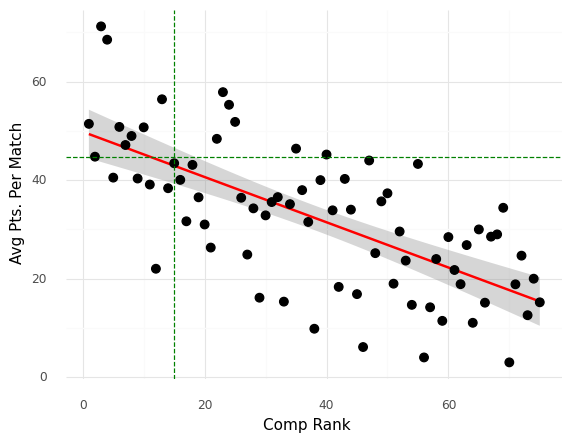

<ggplot: (8745940603713)>


In [ ]:
#Plot just the relationship between the comp rank and avg pts. per match
print(ggplot(finalDF, aes(x = "Comp Rank", y = "Avg Pts. Per Match")) +
      stat_smooth(method='lm', color = 'red') +
      geom_point(size = 3) +
      theme_minimal() + 
      geom_vline(aes(xintercept = 15), color = 'green', linetype = 'dashed') +
      geom_hline(aes(yintercept = 44.77), color = 'green', linetype = 'dashed'))

Captions:
* Figure 1: The relationship between competition arank and average points scored per match is strong and positive (the highest rank/best teams have the lowest numerical rankings, which is why the relationship appears to be negative).

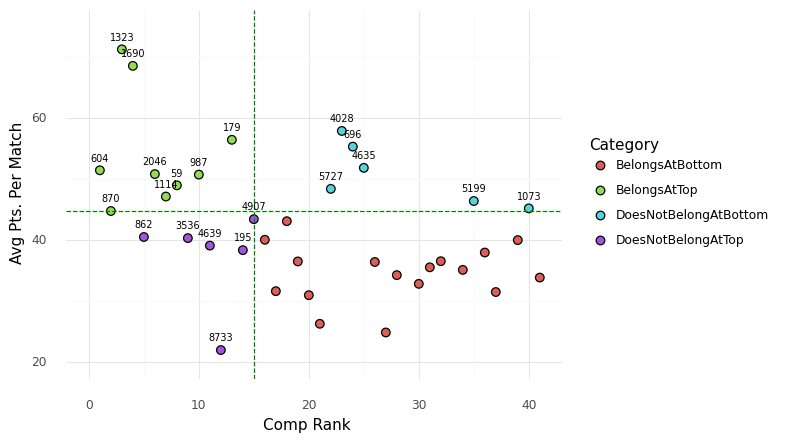

<ggplot: (8745940680945)>


In [ ]:
#Show the teams in the interesting categories around the top 15 ranked teams
print(ggplot(finalDF, aes(x = "Comp Rank", 
                          y = "Avg Pts. Per Match", 
                          fill = "Category")) +
      geom_point(size = 3) +
      theme_minimal() + 
      geom_vline(aes(xintercept = 15), 
                 color = 'green', 
                 linetype = 'dashed') +
      geom_hline(aes(yintercept = 44.77), 
                 color = 'green', 
                 linetype = 'dashed') +
      geom_text(aes(label = "Team Number"), data = bt, nudge_y=2, size = 7) +
      geom_text(aes(label = "Team Number"), data = dbb, nudge_y=2, size = 7) +
      geom_text(aes(label = "Team Number"), data = dbt, nudge_y=2, size = 7) +
      ylim(20, 75) +
      xlim(0, 41))

Captions:
* Figure 2: A scatterplot of a subsection of the teams in the data set. This plot labels the teams that are ranked in the top 15 teams while being in the top 15 average point scorers (green), the teams that are not ranked in the top 15 teams while being in the top 15 average point scorers (blue), the teams that are ranked in the top 15 teams while not being in the top 15 average point scorers (purple), and some of the teams that are not ranked in the top 15 teams and are not in the top 15 average point scorers (red).

**Q3: Response**
* From Figure 1, we see that the relationship between a team's final ranking and their average points scored per match is quite strong. As a team's average points scored per match increases, their ranking typically increases as well, with a few notable outliers.
* It is not safe to assume that the top fifteen ranked teams are the fifteen teams with the highest number of average points scored per match. Figure 2 shows that only nine of the top fifteen ranked teams were among the top fifteen teams in terms of average points scored per match. Teams such as 5199 and 1073, despite losing matches and being ranked poorly, were actually quite strong teams. On the other hand, 8733 and 8020, for example, were ranked far higher than they should have been. This is likely due to having an easier match schedule and better alliance partners than other teams had. 
* This graph shows that it is important to look beyond a team's ranking when determing a team's strength and effectiveness. There are many factors that are related to a team's ranking aside from purely how many points they score. The highest ranked team, 604, for example, had an average points scored per match that was lower than five other teams. 